In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

2023-05-05 19:00:43.344393: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 19:00:43.641745: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 19:00:43.643628: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 19:00:45.059929: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)


In [3]:
# Define the model architecture
model = DecisionTreeClassifier()

# Train the model
_ = model.fit(X_train, y_train)


Test accuracy: 0.953


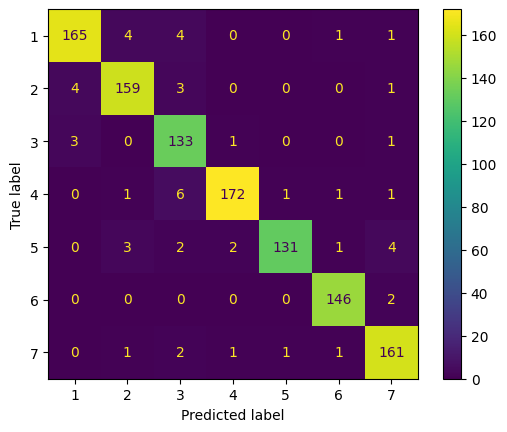

In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Generating the confusion matrix for the model
conf_mat = np.array(confusion_matrix(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()


In [6]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.96      0.94      0.95       175
           2       0.95      0.95      0.95       167
           3       0.89      0.96      0.92       138
           4       0.98      0.95      0.96       182
           5       0.98      0.92      0.95       143
           6       0.97      0.99      0.98       148
           7       0.94      0.96      0.95       167

    accuracy                           0.95      1120
   macro avg       0.95      0.95      0.95      1120
weighted avg       0.95      0.95      0.95      1120



In [6]:
model_name = "decision_tree_v1"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))